# Different levels of coarse-grained models for an external load force smaller than the stall force

With an increasing external load force, the mean velocity of the molecular motor decreases and the forward cycle becomes less dominant in terms of entropy production.
We consider a kinesin motor at an external load force of 6.5 pN, which is a substantial force, but smaller
than the stall force. The mechanical transition 2 → 5 has the
smallest contribution to the steady-state entropy production.
We do not merge states 2 and 5 to preserve the biological interpretation of mechanical steps.

In [7]:
import numpy as np

from matplotlib import pyplot as plt
import math

import time
import random
import networkx as nx
import os

import sys
path='../Bibliotheken/'
sys.path.append(path)

import Steady_State_Calculation_Spanning_Trees as auto
import Kinesin_Parameters as Kinesin
import PDF_Flux_entropy as PDF

In [8]:
Force=6.5e-12
i=1

In [9]:
def entropyProduction(matrix, p):
    P1=0.
    P2=0.
    N=len(matrix)
    #J=CG.NetFlux(matrix,p)
    for i in range(N):
        for j in range(N):
            P1=P1+(matrix[j][i]*p[j]-matrix[i][j]*p[i])*math.log(p[j]/p[i])
            if matrix[i][j]!=0:
                P2=P2+((matrix[j][i]*p[j]-matrix[i][j]*p[i]))*math.log(matrix[j][i]/matrix[i][j])
    P1=0.5*P1
    P2=0.5*P2
    print('P1=dS/dt= '+str(P1))
    print('P2(copling to set of thermodynamic forces)= '+str(P2))
    return P1+P2

def affinity(matrix, p, state1, state2):
    return np.log(matrix[state1][state2]*p[state1])-np.log(matrix[state2][state1]*p[state2])
    

# 6-state model 
## minimal contribution edge 1 -> 2 (forward cycle)

In [10]:
[w, w1]=Kinesin.Kinesin(force=Force)

#calculate steady-state
G=auto.Matrix2Graph(w)
p=auto.steady_state(G)
print(p)

P_6state=entropyProduction(matrix=w, p=p)

print()
print('flux in tri-cyclic 6-state modekl')
flux_6state=w[2-i][5-i]*p[2-i]-w[5-i][2-i]*p[5-i]
print(flux_6state)

print()
print('transition affinities')
A12=affinity(matrix=w, p=p, state1=1-i, state2=2-i)
print('A12 ' +str(A12))
A25=affinity(matrix=w, p=p, state1=2-i, state2=5-i)
print('A25 ' +str(A25))
A23=affinity(matrix=w, p=p, state1=2-i, state2=3-i)
print('A23 ' +str(A23))
A34=affinity(matrix=w, p=p, state1=3-i, state2=4-i)
print('A34 ' +str(A34))
A45=affinity(matrix=w, p=p, state1=4-i, state2=5-i)
print('A45 ' +str(A45))
A61=affinity(matrix=w, p=p, state1=6-i, state2=1-i)
print('A61 ' +str(A61))
A56=affinity(matrix=w, p=p, state1=5-i, state2=6-i)

print()
J12=w[1-i][2-i]*p[1-i]-w[2-i][1-i]*p[2-i]
J25=w[2-i][5-i]*p[2-i]-w[5-i][2-i]*p[5-i]
J34=w[3-i][4-i]*p[3-i]-w[4-i][3-i]*p[4-i]
print('entropy contribution')
print('5->6 ' +str(A56*J12))
print('6->1 ' +str(A61*J12))
print('1->2 ' +str(A12*J12))
print('2->5 ' +str(A25*J25))
print('2->3 ' +str(A23*J34))
print('3->4 ' +str(A34*J34))
print('4->5 ' +str(A45*J34))

[7.33284701e-01 2.59378227e-04 2.85718485e-04 2.64688316e-01
 7.04453619e-04 7.77432245e-04]
P1=dS/dt= -5.915407053080912e-16
P2(copling to set of thermodynamic forces)= 2.7669088941174342

flux in tri-cyclic 6-state modekl
0.061032123693847584

transition affinities
A12 3.9296184581530595
A25 0.03951894659997468
A23 7.609543298486223
A34 2.379039132150658
A45 29.988810451331698
A61 2.361047556598377

entropy contribution
5->6 0.7349034484894141
6->1 0.22807740922607958
1->2 0.37960150132418025
2->5 0.002411925237140212
2->3 0.27065598855528816
3->4 0.0846175864788158
4->5 1.0666410348065165


# 5-state model: merge state 3 and 4
## wcg1

In [11]:
#copying
wcg1=w
#print(wcg1)
#sclicing: delete 4 th row (dim=0)
#numpy.delete(arr, obj, axis=None)
wcg1=  np.delete(wcg1, 4-1, 0)
#print(wcg1)
wcg1=np.delete(wcg1, 4-1, 1) #delete 4 th column (dim=1)
#print(wcg1)
# new rates
wcg1[3-i][2-i]=w[3-i][2-i]*p[3-i]/(p[3-i]+p[4-i])
wcg1[3-i][4-i]=w[4-i][5-i]*p[4-i]/(p[3-i]+p[4-i])
wcg1[4-i][3-i]=w[5-i][4-i]
print()
print(wcg1)
Gcg1=auto.Matrix2Graph(wcg1)
pcg1=auto.steady_state(Gcg1)
print(pcg1)
print(p)
P_5state=entropyProduction(matrix=wcg1, p=pcg1)
print(P_5state)
print(P_6state-P_5state)

print()
print('flux in tri-cyclic 5-state modekl')
flux_5state=wcg1[2-i][4-i]*pcg1[2-i]-wcg1[4-i][2-i]*pcg1[4-i]
print(flux_5state)
print('flux in tri-cyclic 6-state modekl')
flux_6state=w[2-i][5-i]*p[2-i]-w[5-i][2-i]*p[5-i]
print(flux_6state)



[[0.00000000e+00 1.34376794e-01 0.00000000e+00 0.00000000e+00
  1.37195815e-02]
 [7.46537747e+00 0.00000000e+00 1.37195815e+02 6.07257343e+03
  0.00000000e+00]
 [0.00000000e+00 6.65715084e-05 0.00000000e+00 1.34231897e-01
  0.00000000e+00]
 [0.00000000e+00 2.14927025e+03 4.77784158e-12 0.00000000e+00
  1.37195815e+02]
 [1.37195815e+02 0.00000000e+00 0.00000000e+00 6.17381167e-02
  0.00000000e+00]]
[7.33284701e-01 2.59378227e-04 2.64974035e-01 7.04453619e-04
 7.77432245e-04]
[7.33284701e-01 2.59378227e-04 2.85718485e-04 2.64688316e-01
 7.04453619e-04 7.77432245e-04]
P1=dS/dt= 8.673617379884035e-17
P2(copling to set of thermodynamic forces)= 2.682291307638618
2.682291307638618
0.0846175864788159

flux in tri-cyclic 5-state modekl
0.06103212369384714
flux in tri-cyclic 6-state modekl
0.061032123693847584


# Which edge in the 5-state model will be eliminated next?
## edge 5->1

In [12]:
print('transition affinities')
A12=affinity(matrix=wcg1, p=pcg1, state1=1-i, state2=2-i)
print('A12 ' +str(A12))
A23=affinity(matrix=wcg1, p=pcg1, state1=2-i, state2=3-i)
print('A23 ' +str(A23))
A34=affinity(matrix=wcg1, p=pcg1, state1=3-i, state2=4-i)
print('A34 ' +str(A34))
A45=affinity(matrix=wcg1, p=pcg1, state1=4-i, state2=5-i)
print('A45 ' +str(A45))
A51=affinity(matrix=wcg1, p=pcg1, state1=5-i, state2=1-i)
print('A51 ' +str(A51))
A24=affinity(matrix=wcg1, p=pcg1, state1=2-i, state2=4-i)
print('A24 ' +str(A24))

print()
print('entropy production associated with edge 5->1')
print((wcg1[5-i][1-i]*pcg1[5-i]-wcg1[1-i][5-i]*pcg1[1-i])*A51)
print('entropy production associated with edge 2->4')
print((wcg1[2-i][4-i]*pcg1[2-i]-wcg1[4-i][2-i]*pcg1[4-i])*A24)
print('entropy production associated with edge 2->3')
print((wcg1[2-i][3-i]*pcg1[2-i]-wcg1[3-i][2-i]*pcg1[3-i])*A23)

transition affinities
A12 3.9296184581530595
A23 7.609543298486223
A34 29.988810451331698
A45 7.60768897401719
A51 2.3610475565983764
A24 0.0395189465999744

entropy production associated with edge 5->1
0.22807740922607941
entropy production associated with edge 2->4
0.002411925237140178
entropy production associated with edge 2->3
0.27065598855528805


# Merge state 5' and 1' in the 5-state model
## result: tri-cyclic 4-state model 
# Wcg2

In [13]:
#copying
wcg2=wcg1
print(wcg2)
#sclicing: delete 5 th row (dim=0)
#numpy.delete(arr, obj, axis=None)
wcg2=  np.delete(wcg2, 5-1, 0)
print(wcg2)
wcg2=np.delete(wcg2, 5-1, 1) #delete 5 th column (dim=1)
print(wcg2)
# new rates
wcg2[1-i][2-i]=(wcg1[1-i][2-i]*pcg1[1-i])/(pcg1[1-i]+pcg1[5-i])
wcg2[1-i][4-i]=wcg1[5-i][4-i]*pcg1[5-i]/(pcg1[1-i]+pcg1[5-i])
wcg2[4-i][1-i]=wcg1[4-i][5-i]
print()
print(wcg2)
Gcg2=auto.Matrix2Graph(wcg2)
pcg2=auto.steady_state(Gcg2)
print(pcg2)
print(pcg1)
P_4state=entropyProduction(matrix=wcg2, p=pcg2)
print(P_4state)
print((P_5state-P_4state)/P_5state)

print()
print('flux in tri-cyclic 4-state modekl')
flux_4state=wcg2[2-i][4-i]*pcg2[2-i]-wcg2[4-i][2-i]*pcg2[4-i]
print(flux_4state)
print(flux_5state)

[[0.00000000e+00 1.34376794e-01 0.00000000e+00 0.00000000e+00
  1.37195815e-02]
 [7.46537747e+00 0.00000000e+00 1.37195815e+02 6.07257343e+03
  0.00000000e+00]
 [0.00000000e+00 6.65715084e-05 0.00000000e+00 1.34231897e-01
  0.00000000e+00]
 [0.00000000e+00 2.14927025e+03 4.77784158e-12 0.00000000e+00
  1.37195815e+02]
 [1.37195815e+02 0.00000000e+00 0.00000000e+00 6.17381167e-02
  0.00000000e+00]]
[[0.00000000e+00 1.34376794e-01 0.00000000e+00 0.00000000e+00
  1.37195815e-02]
 [7.46537747e+00 0.00000000e+00 1.37195815e+02 6.07257343e+03
  0.00000000e+00]
 [0.00000000e+00 6.65715084e-05 0.00000000e+00 1.34231897e-01
  0.00000000e+00]
 [0.00000000e+00 2.14927025e+03 4.77784158e-12 0.00000000e+00
  1.37195815e+02]]
[[0.00000000e+00 1.34376794e-01 0.00000000e+00 0.00000000e+00]
 [7.46537747e+00 0.00000000e+00 1.37195815e+02 6.07257343e+03]
 [0.00000000e+00 6.65715084e-05 0.00000000e+00 1.34231897e-01]
 [0.00000000e+00 2.14927025e+03 4.77784158e-12 0.00000000e+00]]

[[0.00000000e+00 1.34234

In [14]:
print('transition affinities in tri-cyclic 4-state model')
A12=affinity(matrix=wcg2, p=pcg2, state1=1-i, state2=2-i)
print('A12 ' +str(A12))
A23=affinity(matrix=wcg2, p=pcg2, state1=2-i, state2=3-i)
print('A23 ' +str(A23))
A34=affinity(matrix=wcg2, p=pcg2, state1=3-i, state2=4-i)
print('A34 ' +str(A34))
A41=affinity(matrix=wcg2, p=pcg2, state1=4-i, state2=1-i)
print('A41 ' +str(A41))
A24=affinity(matrix=wcg2, p=pcg2, state1=2-i, state2=4-i)
print('A24 ' +str(A24))


print()
print('entropy production associated with edge 1->2')
print((wcg2[1-i][2-i]*pcg2[1-i]-wcg2[2-i][1-i]*pcg2[2-i])*A12)
print('entropy production associated with edge 2->3')
print((wcg2[2-i][3-i]*pcg2[2-i]-wcg2[3-i][2-i]*pcg2[3-i])*A23)
print('entropy production associated with edge 3->4')
print((wcg2[3-i][4-i]*pcg2[3-i]-wcg2[4-i][3-i]*pcg2[4-i])*A34)
print('entropy production associated with edge 4->1')
print((wcg2[4-i][1-i]*pcg2[4-i]-wcg2[1-i][4-i]*pcg2[1-i])*A41)
print('entropy production associated with edge 2->4')
print((wcg2[2-i][4-i]*pcg2[2-i]-wcg2[4-i][2-i]*pcg2[4-i])*A24)

print()
print('fluxes in the ')
print('forward cycle '+str(wcg2[1-i][2-i]*pcg2[1-i]-wcg2[2-i][1-i]*pcg2[2-i]))
print('backward cycle '+str(wcg2[2-i][3-i]*pcg2[2-i]-wcg2[3-i][2-i]*pcg2[3-i]))
print('mechanical transition '+str(wcg2[2-i][4-i]*pcg2[2-i]-wcg2[4-i][2-i]*pcg2[4-i]))

transition affinities in tri-cyclic 4-state model
A12 3.9296184581530595
A23 7.609543298486223
A34 29.988810451331698
A41 7.60768897401719
A24 0.039518946599974236

entropy production associated with edge 1->2
0.37960150132418025
entropy production associated with edge 2->3
0.270655988555288
entropy production associated with edge 3->4
1.0666410348065158
entropy production associated with edge 4->1
0.7349034484894139
entropy production associated with edge 2->4
0.0024119252371401587

fluxes in the 
forward cycle 0.09660009117083465
backward cycle 0.03556796747698774
mechanical transition 0.06103212369384692


# Coarse grain edge 2->3
# unicyclic 3 state model
# wcg3

In [15]:
#copying
wcg3=wcg2
print(wcg3)
#sclicing: delete 3 th row (dim=0)
#numpy.delete(arr, obj, axis=None)
wcg3=  np.delete(wcg3, 3-1, 0)
print(wcg3)
wcg3=np.delete(wcg3, 3-1, 1) #delete 3 th column (dim=1)
print(wcg3)
# new rates
wcg3[2-i][3-i]=(wcg2[2-i][4-i]*pcg2[2-i]+wcg2[3-i][4-i]*pcg2[3-i])/(pcg2[2-i]+pcg2[3-i])
wcg3[2-i][1-i]=(wcg2[2-i][1-i]*pcg2[2-i])/(pcg2[2-i]+pcg2[3-i])
wcg3[3-i][2-i]=wcg2[4-i][2-i]+wcg2[4-i][3-i]
wcg3[3-i][1-i]=wcg2[4-i][1-i]

print()
print(wcg3)
Gcg3=auto.Matrix2Graph(wcg3)
pcg3=auto.steady_state(Gcg3)
print()
print(pcg3)
print(pcg2)
P_3state=entropyProduction(matrix=wcg3, p=pcg3)
print(P_3state)
print((P_4state-P_3state)/P_4state)

print()
print('flux in unicyclic 3-state model')
flux_3state=wcg3[2-i][3-i]*pcg3[2-i]-wcg3[3-i][2-i]*pcg3[3-i]
print(flux_3state)
print('forward flux conserved')

[[0.00000000e+00 1.34234478e-01 0.00000000e+00 6.53857494e-05]
 [7.46537747e+00 0.00000000e+00 1.37195815e+02 6.07257343e+03]
 [0.00000000e+00 6.65715084e-05 0.00000000e+00 1.34231897e-01]
 [1.37195815e+02 2.14927025e+03 4.77784158e-12 0.00000000e+00]]
[[0.00000000e+00 1.34234478e-01 0.00000000e+00 6.53857494e-05]
 [7.46537747e+00 0.00000000e+00 1.37195815e+02 6.07257343e+03]
 [1.37195815e+02 2.14927025e+03 4.77784158e-12 0.00000000e+00]]
[[0.00000000e+00 1.34234478e-01 6.53857494e-05]
 [7.46537747e+00 0.00000000e+00 6.07257343e+03]
 [1.37195815e+02 2.14927025e+03 0.00000000e+00]]

[[0.00000000e+00 1.34234478e-01 6.53857494e-05]
 [7.30057479e-03 0.00000000e+00 6.07261837e+00]
 [1.37195815e+02 2.14927025e+03 0.00000000e+00]]

[7.34062133e-01 2.65233413e-01 7.04453619e-04]
[7.34062133e-01 2.59378227e-04 2.64974035e-01 7.04453619e-04]
P1=dS/dt= -9.992007221626409e-16
P2(copling to set of thermodynamic forces)= 1.1204795937158103
1.1204795937158094
0.5434466431631855

flux in unicyclic 3-s

# Make 2-state model 
## wcg4

In [16]:
wcg4=np.zeros((2,2))
wcg4[2-i][1-i]=(wcg3[2-i][1-i]*pcg3[2-i]+wcg3[3-i][1-i]*pcg3[3-i])/(pcg3[2-i]+pcg3[3-i])
wcg4[1-i][2-i]=wcg3[1-i][2-i]+wcg3[1-i][3-i]
pcg4=[wcg4[2-i][1-i]/(wcg4[2-i][1-i]+wcg4[1-i][2-i]), wcg4[1-i][2-i]/(wcg4[2-i][1-i]+wcg4[1-i][2-i])]
print(pcg4)
print(pcg3)

print()
print('flux in equilibrium 2-state modekl')
flux_2state=wcg4[1-i][2-i]*pcg4[1-i]-wcg4[2-i][1-i]*pcg4[2-i]
print(flux_2state)

[0.734062133315472, 0.265937866684528]
[7.34062133e-01 2.65233413e-01 7.04453619e-04]

flux in equilibrium 2-state modekl
0.0


In [17]:
print('fluxes')
print([flux_6state,flux_5state,flux_4state,flux_3state, flux_2state])

fluxes
[0.061032123693847584, 0.06103212369384714, 0.06103212369384692, 0.09660009117083446, 0.0]


In [18]:
CG_nodes=[0,1/6,2/6,3/6,4/6]
CG_Entropy=[0, (P_6state-P_5state)/P_6state, (P_6state-P_4state)/P_6state, (P_6state-P_3state)/P_6state, (P_6state-0)/P_6state]
print(CG_Entropy)
diff=np.array(CG_Entropy)-np.array(CG_nodes)
print(diff)
CG_fluxes=[flux_6state-flux_6state,(flux_5state-flux_6state)/flux_6state,(flux_4state-flux_6state)/flux_6state,(flux_3state-flux_6state)/flux_6state, (flux_6state-flux_2state)/flux_6state]
print(CG_fluxes)

[0, 0.030581992294258946, 0.11301239313289205, 0.5950428306121691, 1.0]
[ 0.         -0.13608467 -0.22032094  0.09504283  0.33333333]
[0.0, -7.276319141010484e-15, -1.0914478711515724e-14, 0.5827745345288114, 1.0]


(0.0, 0.67)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


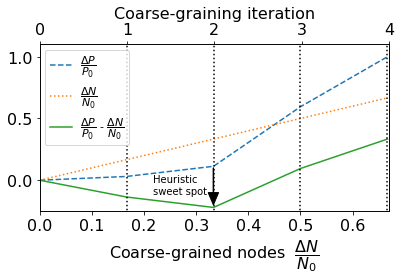

In [19]:
f_size = 16
legend_size = 11

fig, axs = plt.subplots(1,1)
#axs.set_ylabel('Fractional change', fontsize=f_size)
axs.set_xlabel('Coarse-grained nodes  $\dfrac{\Delta N}{N_0}$', fontsize=f_size)
    
axs.plot(CG_nodes, CG_Entropy, label='$\dfrac{\Delta P}{P_0}$', linestyle='--')
axs.plot(CG_nodes, CG_nodes, label='$\dfrac{\Delta N}{N_0}$', linestyle='dotted')
axs.plot(CG_nodes, diff, label='$\dfrac{\Delta P}{P_0}$ - $\dfrac{\Delta N}{N_0}$')

axs.arrow( x=0.333, y=0.1, dx=0, dy=-0.2,  head_width=0.02, head_length=0.1, fc='k', ec='k')  
axs.legend(prop={'size': legend_size}, loc='upper left')
    
#plot iteration
itera1=[[1/6,1/6], [-0.6, 1.1]]
itera2=[[2/6,2/6], [-0.6, 1.1]]
itera3=[[3/6,3/6], [-0.6, 1.1]]
itera4=[[4/6,4/6], [-0.6, 1.1]]
axs.plot(itera1[0], itera1[1], linestyle=':', color='black')
axs.plot(itera2[0], itera2[1], linestyle=':', color='black')
axs.plot(itera3[0], itera3[1], linestyle=':', color='black')
axs.plot(itera4[0], itera4[1], linestyle=':', color='black')
axs.set_ylim([-0.25,1.1])
axs.set_xlim([-0,0.67])

axs.tick_params(axis='both', labelsize=f_size)
    
ax2 = axs.twiny()
ax2.tick_params(axis='both', labelsize=f_size)
print(axs.get_xlim())
new_tick_locations = np.array([0,1,2,3,4])
ax2.set_xticks(new_tick_locations)
#ax2.set_xticklabels(tick_function(new_tick_locations))
ax2.set_xlabel(r"Coarse-graining iteration", fontsize=f_size)
plt.text(1.3, -0.11, 'Heuristic \nsweet spot')

fig.tight_layout()
fig.savefig('Iteratives_CG_Kinesin_Force=6.5e-12N.eps',bbox_inches="tight")
plt.show()

(0.0, 0.67)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


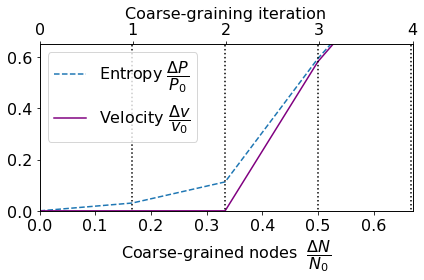

In [20]:
fig, axs = plt.subplots(1,1)
#axs.set_ylabel('Fractional change', fontsize=f_size)
axs.set_xlabel('Coarse-grained nodes  $\dfrac{\Delta N}{N_0}$', fontsize=f_size)
   
axs.plot(CG_nodes, CG_Entropy, label='Entropy $\dfrac{\Delta P}{P_0}$', linestyle='--')   
axs.plot(CG_nodes, CG_fluxes, label='Velocity $\dfrac{\Delta v}{v_0}$', color='purple')
#axs.plot(CG_nodes, diff, label='$\dfrac{\Delta P}{P_0}$ - $\dfrac{\Delta N}{N_0}$')

    
#plot iteration
itera1=[[1/6,1/6], [-0.6, 1.1]]
itera2=[[2/6,2/6], [-0.6, 1.1]]
itera3=[[3/6,3/6], [-0.6, 1.1]]
itera4=[[4/6,4/6], [-0.6, 1.1]]
axs.plot(itera1[0], itera1[1], linestyle=':', color='black')
axs.plot(itera2[0], itera2[1], linestyle=':', color='black')
axs.plot(itera3[0], itera3[1], linestyle=':', color='black')
axs.plot(itera4[0], itera4[1], linestyle=':', color='black')
axs.set_ylim([-0.001,0.65])
axs.set_xlim([-0,0.67])
axs.legend(prop={'size': f_size}, loc='upper left')

axs.tick_params(axis='both', labelsize=f_size)
    
ax2 = axs.twiny()
ax2.tick_params(axis='both', labelsize=f_size)
print(axs.get_xlim())
new_tick_locations = np.array([0,1,2,3, 4])
ax2.set_xticks(new_tick_locations)
#ax2.set_xticklabels(tick_function(new_tick_locations))
ax2.set_xlabel(r"Coarse-graining iteration", fontsize=f_size)
#plt.text(2.3, -0.25, 'Heuristic \nsweet spot')

#axs.arrow( x=0.4, y=0.027, dx=0.05, dy=0.,  head_width=0.01, head_length=0.05, fc='k', ec='k')
#plt.text(2.1, 0.118, 'uni-cyclic\nmodel ',fontsize=15)
#axs.arrow( x=2.5/6, y=0.15, dx=0.07, dy=0.025,  head_width=0.007, head_length=0.01, fc='k', ec='k')

#plt.text(3.15, 0.118, 'two-state\nmodel ',fontsize=15)
#axs.arrow( x=3.5/6, y=0.15, dx=0.07, dy=0.025,  head_width=0.007, head_length=0.01, fc='k', ec='k')

#axs.arrow( x=1/6, y=0.15, dx=0, dy=0.02,  head_width=0.01, head_length=0.01, fc='k', ec='k')
#axs.arrow( x=1/6, y=0.15, dx=1/6*0.95, dy=0.025,  head_width=0.007, head_length=0.01, fc='k', ec='k')
#axs.arrow( x=1/6, y=0.15, dx=-1/6*0.95, dy=0.025,  head_width=0.007, head_length=0.01, fc='k', ec='k')
#plt.text(0.72, 0.118, 'tri-cyclic\nmodel ',fontsize=15)

fig.tight_layout()
fig.savefig('Iteratives_CG_Kinesin_Force=6.5e-12N_velocity.eps',bbox_inches="tight")
plt.show()